
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">



# <center> **06. CNN FUNDAMENTALS!** </center>

*“It can be concluded that from now on, deep learning with CNN has to be considered as the primary candidate in essentially any visual recognition task.” [Razavian 2014]*

##  **Outline**
1. [**Dealing with images and convolution**](#Imgs_conv)
2. [**CNN: Introduction of Convolutional neuronal networks**](#Intro_conv)
3. [**CNN: Visualizing activations**](#Act)
4. [**CNN: Initialization, dropout and other tricks**](#Tricks)



In [ ]:
#@title **Student:** Mount the Drive  (If you are in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA2')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-IA2


In [ ]:
#@title **Load libraries**
#@markdown Here is important to change to GPU  

import sys
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


# **1. Dealing with images and convolution** <a name="Imgs_conv"></a>

Images are **matrices** of namely, three channels. Each **value** of the matrix is a **pixel** and  represents a color value w.r.t **intensities**, namely, between $[0-255]$ = $2^{8}$. In terms of color, each matrix represent the quantity of color at each channel. 

- **Objects in world are a set of pixels in images. Did you see the complexity of the problem?**
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/dl_1.png" width="400">


# **[CIFAR 10](https://https://www.cs.toronto.edu/~kriz/cifar.html)**

The CIFAR (Canadian Institute For Advanced Research) - 10 is used for **small photo classification problem** on computer vision + machine learning (specially deep learning). The dataset is comprised of 60,000 images, where each one of them has a $(w,y)$ of 32×32 pixel color. Each image has photographs of objects from 10 classes. 


```
[0: airplane, 1: automobile, 2: bird, 
3: cat, 4: deer, 5: dog, 6: frog, 
7: horse, 8: ship, 9: truck]
```

Since we now know tha dataset classes, we should **go to the action!**

1. Load CIFAR10


In [ ]:
#@title **Coding:** loading the CIFAR10 dataset. 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

print("CIFAR 10")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

CIFAR 10
(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


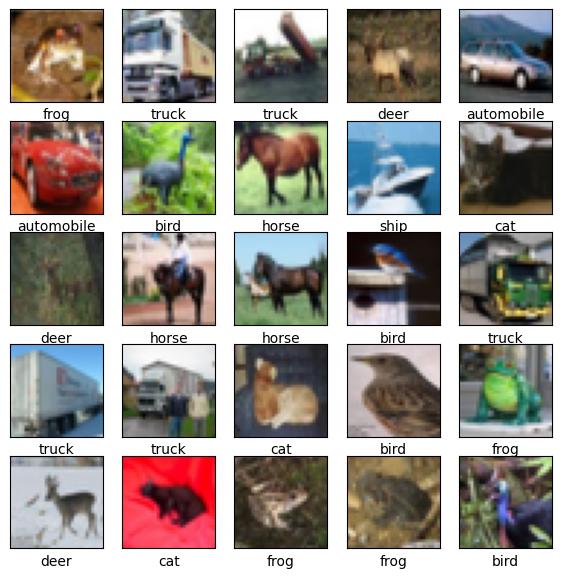

In [ ]:
#@title **Coding:** time to plot our classes
class_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [ ]:
#@title **Coding** now we have to organize the data.

# Reshape the tensors
x_train = x_train.reshape([-1, 32, 32, 3])
x_test = x_test.reshape([-1, 32, 32, 3])

# A must: having the matrixes on float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Use one hot encodding vectors for targets 
y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train) 

# Normalizing the data
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0], "y_train:", y_train.shape)
print('Number of images in x_test', x_test.shape[0], "y_test: ", y_test.shape)

x_train shape: (50000, 32, 32, 3)
Number of images in x_train 50000 y_train: (50000, 10)
Number of images in x_test 10000 y_test:  (10000, 10)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Define a DNN architecture for CIFAR-10
- Use almost three layers
- Evaluate the performance of the approach


In [ ]:
#@title **Student solution** Build a DNN and summarize the architecture

""" 
Put your code here 
"""   

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1573376   
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#@title **Student solution** Compile and test the model

""" 
Put your code here 
"""   

' \nPut your code here \n'

Epoch 1/10
782/782 [==============================] - 4s 4ms/step - loss: 1.9017 - accuracy: 0.3270 - val_loss: 1.7670 - val_accuracy: 0.3768
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.7254 - accuracy: 0.3935 - val_loss: 1.6746 - val_accuracy: 0.4092
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 1.6484 - accuracy: 0.4224 - val_loss: 1.6067 - val_accuracy: 0.4334
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5916 - accuracy: 0.4405 - val_loss: 1.5650 - val_accuracy: 0.4496
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5475 - accuracy: 0.4552 - val_loss: 1.5530 - val_accuracy: 0.4456
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 1.5094 - accuracy: 0.4699 - val_loss: 1.5166 - val_accuracy: 0.4626
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 1.4780 - accuracy: 0.4809 - val_loss: 1.4877 - val_accuracy: 0.4736
Epoch 

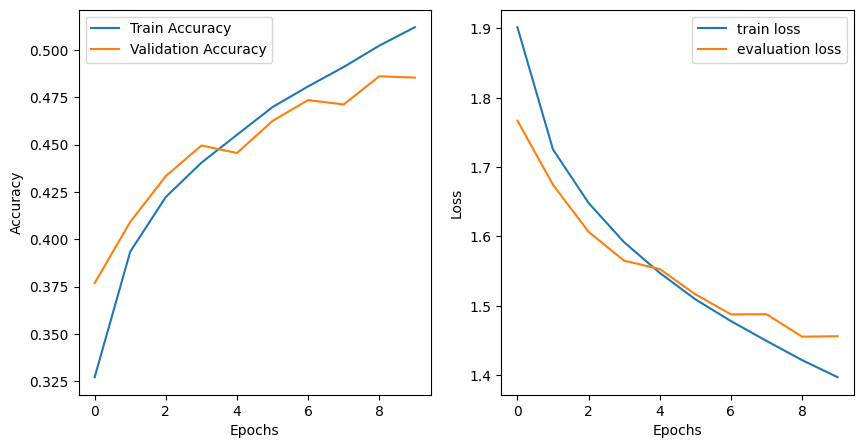

In [ ]:
#@title **Coding:** Show the prediction for a specific image

# Train the model
history = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_data = (x_test, y_test))

# Show the loss and accuracy of the model
fig = plt.figure(figsize = (10,5))

#Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label = 'Train Accuracy');
ax.plot(history.history['val_accuracy'], label = 'Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

#Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label = 'train loss');
ax.plot(history.history['val_loss'], label = 'evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

313/313 [==============================] - 1s 2ms/step
Predicted value: 3  Class:  cat
Max prob:  0.37124914 Ground truth:  dog
(10000, 10)


<Figure size 640x480 with 0 Axes>

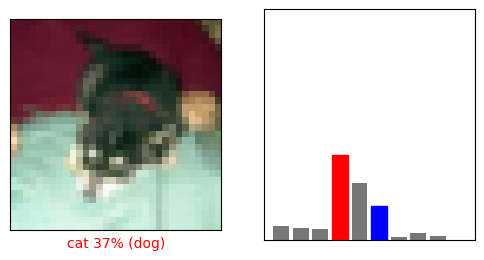

In [ ]:
#@title **Coding:** What happened? Why the results are bad?

%run code/dl_plot.py
index_vector =  128 #@param {type:"integer"}

# Why do we use the predict and not the evaluate here? 
predictions = model.predict(x_test)

# Let's predict only one image
print("Predicted value:",  np.argmax(predictions[index_vector]), " Class: ", class_names[np.argmax(predictions[index_vector])])
print("Max prob: ", np.max(predictions[index_vector]), "Ground truth: ", class_names[np.argmax(y_test ,axis=1)[index_vector]])
print(predictions.shape)

# Plot the image
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_vector, predictions, np.argmax(y_test ,axis=1), x_test)
plt.subplot(1,2,2)
plot_value_array(index_vector, predictions,  np.argmax(y_test ,axis=1))


#### **Dealing with image variations**
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/dl_2.png" width="700">

Now, did you see the visual representation complexity? If not, you can take a [look here](https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/blob/master/complement_notes/VisualRepresentationComplexity.ipynb)

- What type of problems do we have? Which are the limitations?
- Can we use prior knowledge from images? For instance, local properties?

# **2. CNN: Introduction of Convolutional Neuronal Networks** <a name="Intro_conv"></a>

<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN.png">  

The Convolutional Neuronal Network (CNN) architectures are able to successfully capture the **Spatial dependencies** of the images, through the learning of **most descriptive filters**. 

### **Convolutions: the new neuron units to learn**

The convolution is a **fundamental** operation to compute **visual features**.  For instance, a **KERNEL** mask with size $3 \times 3$ is sliding around the image. At each position, each corresponding pixel is multiplied by corresponding value in **kernel**  and finally the values are sum up  to obtain a new estimated value. 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/Convolution_schematic.gif" style="width:200px">

For images (signals in 2D), the convolution operation could be defined as: 

$$I(x,y) = \sum_{u=0}^{n} \sum_{v=0}^{m} I(x,y)h(u-x, v-y)$$, 
$$\hat{I}(x,y) = I(x,y)*h(x,y)$$


In typical, images with three channels, the convolution works, as: 
<img width="500" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN-3.gif"> 

Depending of **KERNEL**, there is produced different **features**, such as edges, color filters, smoothing, among much others. The problem es is then:

- Which are the **BEST** kernels to represent any image classes ?
- The analytical answer is so complicated (may be impossible), so, we can **LEARN THE KERNELS**
- So, we can see the kernel as a **local neuron unit** and we can reformulte the problem to fix best weights  of convolution kernel!. 

From this approximation, we have new kind of deep learning architectures that nowadays represent the state-of-the-art in image representation and other related areas!...

Some additional concepts to consider to reduce complexity: 
- **Stride length**: The Kernel shifts every time to perform operation between Kernel and the portion of the image.

- **Padding:** The process to add **artifitial** columns or rows to obtain same image input dimensions.
    - *Same padding:* add rows and colums to obtain in response the same image dimension
    - *Valid padding:* Not use any padding. 

 
### **Main Convolutional (Conv) Layers**

Then, if **neuron units** are **convolutions**, the **Layers** are basically a set of **learned kernels**, that hiearchically achieve a **very robust representations**. Nowadays, a CNN architecture is then form by these main layers: 

#### **Convolutional Layers**

A set of convolutional kernels (filters) to turn input images into output images (responses). For instance, using **valid padding** and 8 filters, we obtain: 

<img width="200px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN-7.png"> 

#### **Pooling Layers**

These layers are speciallized on reduce spatial size of CNN features, allowing  decrease the computational time and  extracting **dominant features** which are rotational and positional invariant. Also allows as a Noise Suppressant

There are two types of pooling: **Max-Pooling**, **Average pooling**. 

<img width="200px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN-4.jpeg">  

<img width="400px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN-8.png">



#### **Fully-Connected layer**

At the end of CNN architectures, we namely use DNNs, that allows to learn non-linear combinations of the high-level features and robustly represent the descriptor for any input. 

<img width="400px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN-9.png">  


Now, we have the complete recipe: 

<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN.png">  

Since we learn all the theory **we can now go to the action!**




In [ ]:
#@title **Coding:** time to pay attention on the computational complexity

model_CNN =  tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_CNN.add(tf.keras.layers.Dense(10, activation='softmax'))
model_CNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                524352    
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                      

In [ ]:
#@title **Coding** It's the same notation as DNN to compile model
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

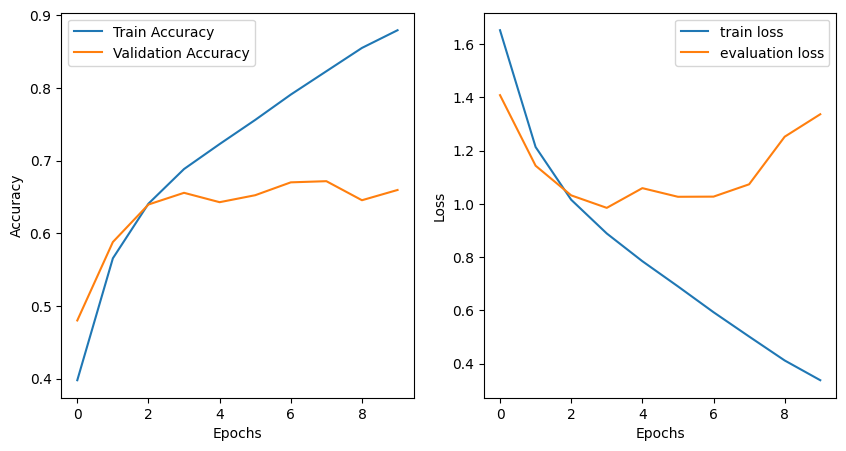

In [ ]:
#@title **Coding** Time to show prediction for a specific image

# It's time to fit the model 
history = model_CNN.fit(x_train, y_train, epochs=10,verbose=0, batch_size=64,validation_data=(x_test, y_test))

#Time to plot the loss and accuracy
fig = plt.figure(figsize=(10,5))

# Accuracy
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

# Loss
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

313/313 [==============================] - 1s 2ms/step
Predicted valie: 4  Class:  deer
Max prob:  0.63408935 Ground truth:  deer
(10000, 10)


<Figure size 640x480 with 0 Axes>

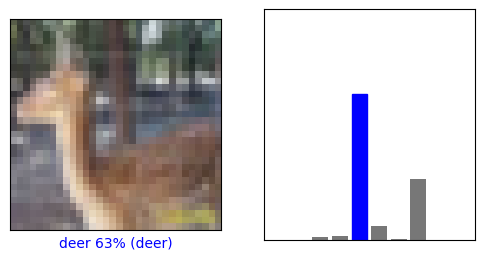

In [ ]:
#@title **Coding:**  Evaluate the results obtained

%run code/dl_plot.py
index_vector =  427 #@param {type:"integer"}

# Why do we use the predict and not the evaluate here? 
predictions = model_CNN.predict(x_test)

# Look at the predicted value for one sample
print ("Predicted valie:",  np.argmax(predictions[index_vector]), " Class: ", class_names[np.argmax(predictions[index_vector])])
print ("Max prob: ", np.max(predictions[index_vector]), "Ground truth: ", class_names[np.argmax(y_test ,axis=1)[index_vector]])

print(predictions.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_vector, predictions, np.argmax(y_test ,axis=1), x_test)
plt.subplot(1,2,2)
plot_value_array(index_vector, predictions,  np.argmax(y_test ,axis=1))

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

**Pay attention in which layer there is more parameters to learn.**

Now, you can propose a new CNN architecture. Use additional convolution and pooling layers. You can also change: 

- The optimizer 
- Epochs
- Batch size
- So may parameters to learn...
- Report yout results. 


In [ ]:
#@title **Student solution** Build a CNN and train it

# Sequential model
""" 
Put your code here 
"""   

# Compile
""" 
Put your code here 
"""   

# Fit the model
""" 
Put your code here 
"""   

# Showing the loss and accuracy
""" 
Put your code here 
"""   

' \nPut your code here \n'

#**3. CNN: Visualizing activations**  <a name="Act"></a>

CNN architectures are not only important because their results, their efficiency, robust, hierarchical and descriptive visual models! In fact: 

- The  first ConvLayer captures the Low-Level features such as edges, color. Learn **BEST FEATURES** for a particular problem
- Then,  the next convlayer learn high-level features of these primitives
- From biology, is analogous to connectivity pattern of Neurons in the Human Brain. **Emulate visual cortex!**, only respond in a restricted region of visual field. 
- The pre-processing required in a ConvNet is much lower as compared to other classification algorithms.

- Performs a better fitting learning due to the reduction in the number of parameters. 
  - For instace. For an image in DNN $(224 \times 224 \times 3) =105.528$ input features
  - And a hidden layer of 1024 (very small respect to the input) is $(105.528 \times 1024)$ that gives **150 millons of parameters!**... imposible to train!
- Are invariant to spatial position of the objects. If an object is in different position of an image the DNN react very different.  

#### We learn  features from low to high level !!

<img width="700px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN-10.png"> 

<img width="700px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/DF_1.png"> 


Using **Tensorflow-Keras** we can visualize such activations, that represent the output of convolutions. 

In [ ]:
#@title **Coding**  How can we extract the layer outputs?
layer_outputs = [layer.output for layer in model_CNN.layers ]
layer_outputs

[<KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 8, 8, 32) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'flatten_5')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_14')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_15')>]

1/1 [==============================] - 0s 209ms/step


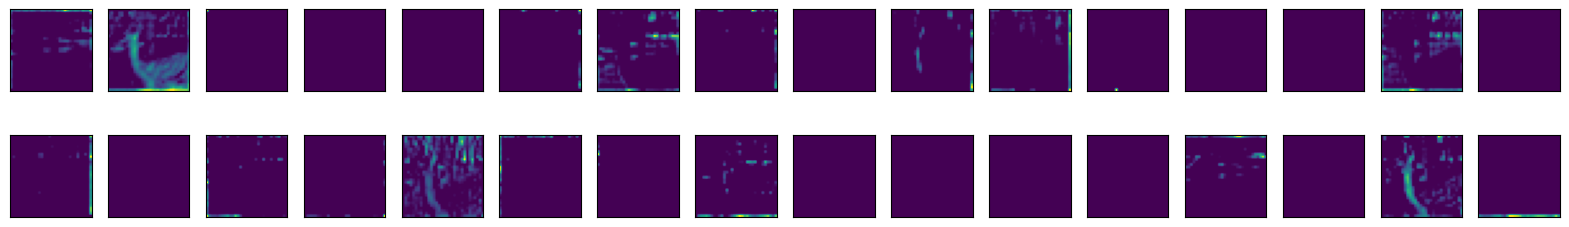

In [ ]:
#@title **Coding** Visualize the first layer
activation_model = tf.keras.models.Model(inputs=model_CNN.input, outputs=layer_outputs)
array = np.expand_dims(x_test[427], axis=0)
activations = activation_model.predict(array)
plt.figure(figsize=(20,3))
for i in range(32):
    plt.subplot(2,16,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(activations[0][0,:, :, i], cmap='viridis')

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Now, visualize second layer activations.

In [ ]:
#@title **Student solution** visualize N layers
"""
Put you code here
"""

#**4. CNN: Initialization, dropout and other tricks**  <a name="Tricks"></a>


There exist additional factors that could be implemented over CNN and in general over deep lerning approaches to achieve much better representations. 


### **Initialization of weights to be learned**

A dramatical parameter to properly converge or almost to obtain a faster covergence it is the initializaciont of parameters.  There exist many ways to initialize weights, that range from classical  distributions to more sophisticated methods. The most common are: 

- **Random normal** : uses a normal distribution for weights at each layer
- **Random uniform**: uses a unifrom distribution for weights at each layer
- **Truncated Normal** same than normal but values out of two standar deviation are discarded

- **Lecun Uniform** it is like a uniform distribution but stablish a range `[-lim, lim]` with $lim = \sqrt{(\frac{3}{\text{# input units}})}$



- **Glorot normal** or Xavier initialization use a truncated normal version, but with a standard deviation defition such as: 

$$ sigma = \sqrt{\frac{2}{\text{# input units} -  \text{# output units}}}$$

This glorot initialization it is used by default in keras  at each of the layers.

**Lets go to try with some initialization**


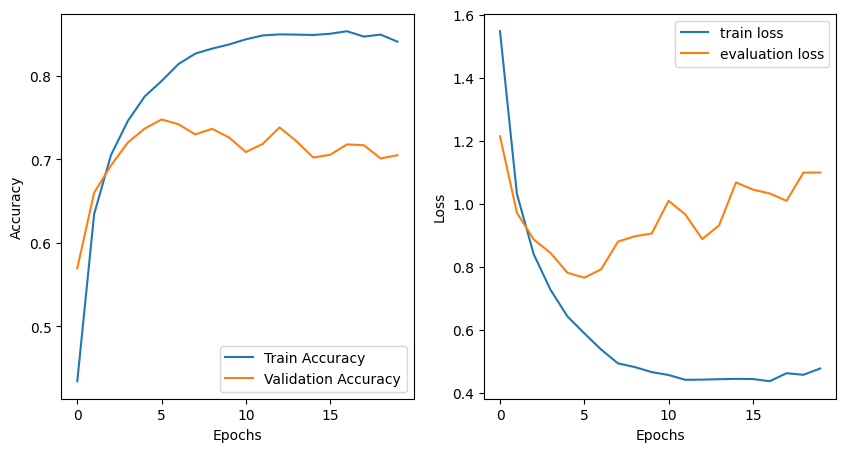

In [ ]:
#@title **Coding** Let's use a random initialization

# Do the sequential model
model_in = tf.keras.models.Sequential()
model_in.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_in.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in.add(tf.keras.layers.Flatten())
model_in.add(tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu'))
model_in.add(tf.keras.layers.Dense(10, activation='softmax'))

# Time to compile
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_in.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
history = model_in.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))

# Plot the loss and accuracy
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

1. What it is `he uniform `?
2. Test with other configuration to init layers and report results. 

In [ ]:
#@title **Student code**
"""
Put your code here
"""

### **Dropout to avoid overfitting**

This technique randomly drop nodes out of the network with a consecuent regularizing effect, avoiding overfitting problems

- some number of layer outputs are randomly ignored or “dropped out"
- In Keras this effect is achieved by introducing a dropout layer
- the amount of nodes removed is specified as a parameter.
- In this example it is add Dropout layers after each max pooling layer

**Lets go to try**

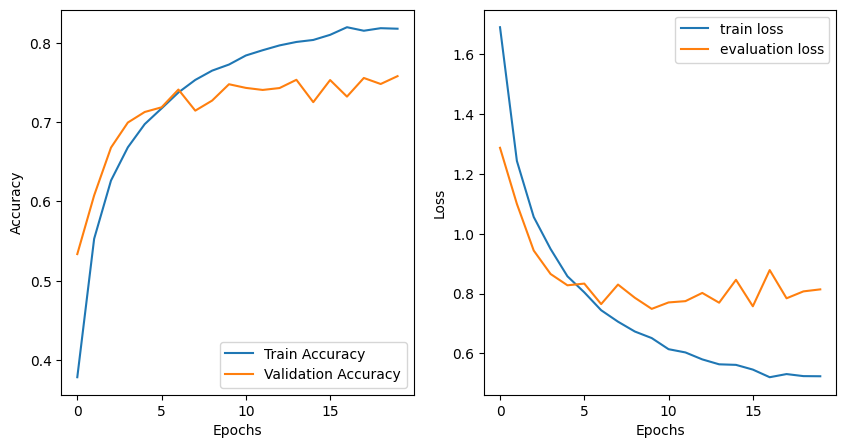

In [ ]:
#@title **Coding** CNN with dropout.

# Do the sequential model
model_in_do = tf.keras.models.Sequential()
model_in_do.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_in_do.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do.add(tf.keras.layers.Dropout(0.2))
model_in_do.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do.add(tf.keras.layers.Dropout(0.2))
model_in_do.add(tf.keras.layers.Flatten())
model_in_do.add(tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu'))
model_in_do.add(tf.keras.layers.Dropout(0.2))
model_in_do.add(tf.keras.layers.Dense(10, activation='softmax'))

# Time to compile
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_in_do.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
history = model_in_do.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))

# Plot the loss and accuracy
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

### **Batch normalization**

An additional process to normalize the activation outputs. This normalization acts as standar normalization by keeping mean activation close to **ZERO** and standar deviation close to **ONE**. This relative simple process allows to acelerate training network and reduce the overfitting [1].  

**Lets go to try**

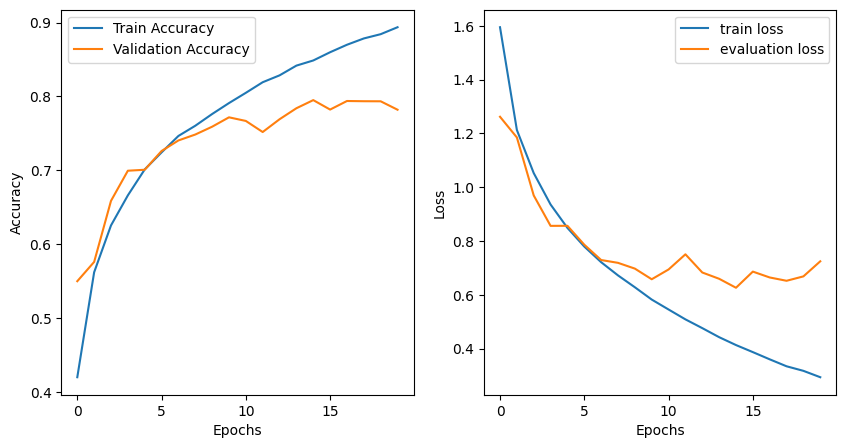

In [ ]:
#@title **Coding** CNN with Batch normalization

# Do the sequential model
model_in_do_ba = tf.keras.models.Sequential()
model_in_do_ba.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do_ba.add(tf.keras.layers.Dropout(0.2))
model_in_do_ba.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do_ba.add(tf.keras.layers.Dropout(0.2))
model_in_do_ba.add(tf.keras.layers.Flatten())
model_in_do_ba.add(tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu'))
model_in_do_ba.add(tf.keras.layers.Dropout(0.2))
model_in_do_ba.add(tf.keras.layers.Dense(10, activation='softmax'))

# Time to compile
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model_in_do_ba.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
history = model_in_do_ba.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))

# Plot the loss and accuracy
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
#@title **Coding:** Time to evaluate the model
model_in_do_ba.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7246 - accuracy: 0.7821


[0.7246478796005249, 0.7821000218391418]

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Now try to use batch normalization without use dropout. **ONLY** use batch normalization and report the results
- Use batch normalization for some layers, justify which layer did you selected
- Finally, built a CNN that report your best results and visualize the predictions

In [ ]:
#@title **Student code**

# Sequential model
""" 
Put your code here 
"""   

# Compile
""" 
Put your code here 
"""   

# Fit the model
""" 
Put your code here 
"""   

# Showing the loss and accuracy
""" 
Put your code here 
"""

<Figure size 432x288 with 0 Axes>

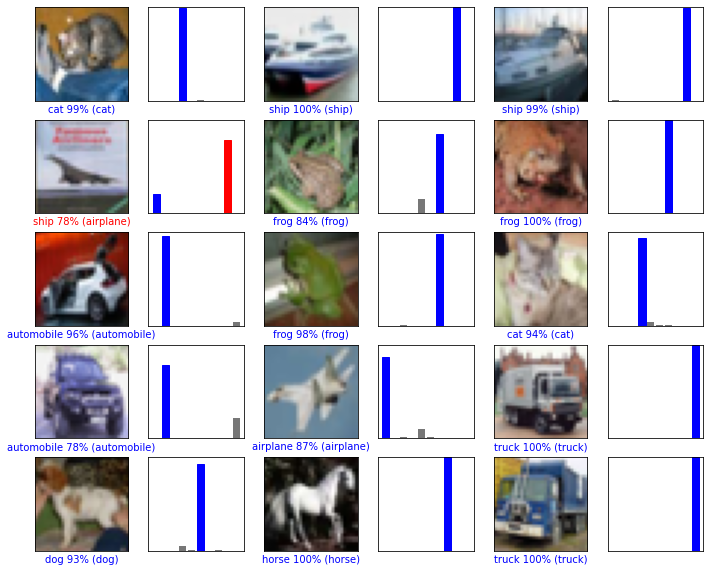

In [ ]:
#@title **Coding** An overview of the results obtained
%run code/dl_plot.py

predictions = model_in_do_ba.predict(x_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, np.argmax(y_test ,axis=1), x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, np.argmax(y_test ,axis=1))

# References

1. [Batch normalization](https://arxiv.org/pdf/1502.03167.pdf)
2. [Dropout](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf)
3. [A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">

In [ ]:
https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

In [ ]:
# To do a second lecture of CNN

https://engmrk.com/lenet-5-a-classic-cnn-architecture/